In [2]:
# importing libraries, etc...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

path = "https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/data/"

The mnist dataset contains 70,000 labeled handwritten digits. The digits were recorded as 28x28 images, and the dataset contains the grey values of all the pixel values (so 28*28=784 pixel values for each sample). The aim is to create a model that can accurately classify whether a given digit is a 0, 1, 2, etc... 

Examples:

<div>
<img src="https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/media/mnist.png" width="500"/>
</div>

To make model-building a little more feasible, I've taken a subset of the dataset containing 20,000 samples, rather than the full 70,000. 

In [3]:
# loading

mnist = pd.read_csv(path+"mnist.csv")

In [4]:
# viewing

mnist

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Check if there are any missing values...

mnist.isna().any(axis=1).sum()

# Nope!

0

Splitting into training and test set. 

(Changing the random_state parameter in the train_test_split function to a different number will result in a different random split of the data. Try playing around with it and then running your model(s) again to see how a different split might result in a different score.)

In [6]:
from sklearn.model_selection import train_test_split

features_train_orig, features_test_orig, target_train, target_test = train_test_split(mnist.iloc[:,1:], 
                                                                    mnist.iloc[:,0], 
                                                                    random_state=99)

Let's start with our good old k-NN classifier...

Note that even this subset I've taken of the mnist dataset is quite large, with 20,000 samples and 784 features. Because of this, model-building / prediction can take some time.

However, we can save a bit of time by using the n_jobs parameter when building a model. Setting n_jobs=-1 (as done below) tells sklearn to use all of your CPU cores, whereas by default it will only use 1. This means that if your PC has 8 CPU cores, building the model will be 8 times as fast!

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, weights="uniform", n_jobs=-1).fit(features_train_orig, target_train)
print("Training set score: {:.4f}".format(knn.score(features_train_orig, target_train)))
print("Test set score: {:.4f}".format(knn.score(features_test_orig, target_test)))

Training set score: 0.9611
Test set score: 0.9530


Now, it's your turn to use any of the models we've discussed to see how well they perform on this task. Note that this is a classification problem, so only classification models will work on it. Perhaps even more important than choosing a classifier is trying out different parameter settings (e.g. n_neighbors for k-Nearest Neighbors, C for Logistic Regression, n_estimators for the Random Forest Classifier, etc...). 

Below are the classification models we've discussed, along with the import statement and the parameters that we've covered during the sessions.

- **k-Nearest Neighbors Classifier** (already imported in the cell above)
    - n_neighbors (any number above 0)
    - weights ("uniform", "distance")
- **Linear Support Vector Machine** (from sklearn.svm import LinearSVC)
    - C
- **Decision Tree Classifier** (from sklearn.tree import DecisionTreeClassifier)
    - max_depth (a whole number above 0)
    - min_samples_split (a whole number above 1)
- **Random Forest Classifier** (from sklearn.ensemble import RandomForestClassifier)
    - n_estimators (a whole number above 0)
    - max_depth (a whole number above 0)
    - min_samples_split (a whole number above 1)
- **Gradient Boosting Classifier** (from sklearn.ensemble import GradientBoostingClassifier)
    - n_estimators (a whole number above 0)
    - max_depth (a whole number above 0)
    - min_samples_split (a whole number above 1)
    - learning_rate (a number between 0 and 1)
    - subsample (a number between 0 and 1)
    
If you want to access even more parameter settings than we've discussed in class (models tend to have a lot), you can also access the sklearn documentation. For example, [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), you can find all possible parameters to tune for the KNeighborsClassifier.

Good luck and feel free to share your model (and the results you obtain with it) on the Canvas discussion page!

In [9]:
# A quick look at the dataset showed me there are a lot of 0 values; let's check if there are any columns that only contain 
# the value 0 (i.e., pixels that are always black)

blackPixels = [col for col in mnist.columns if len(mnist[col].value_counts()) == 1]

print(len(blackPixels))

88


In [10]:
# Drop columns that represent always-black pixels

mnistDrop = mnist.drop(columns=blackPixels)

In [11]:
mnistDrop.shape

(20000, 697)

In [12]:
features_train, features_test, target_train, target_test = train_test_split(mnistDrop.iloc[:,1:], 
                                                    mnistDrop.iloc[:,0], 
                                                    random_state=99)

In [13]:
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1).fit(features_train, target_train)
print("Training set score: {:.4f}".format(knn.score(features_train, target_train)))
print("Test set score: {:.4f}".format(knn.score(features_test, target_test)))

Training set score: 0.9611
Test set score: 0.9530


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50).fit(features_train)

In [27]:
features_train_pca = pca.transform(features_train)
features_test_pca = pca.transform(features_test)

In [28]:
features_train_pca.shape

(15000, 50)

In [29]:
pca.explained_variance_ratio_

array([0.09794677, 0.07069217, 0.06328297, 0.05414519, 0.04759123,
       0.04382618, 0.03311007, 0.02918973, 0.02805863, 0.02331482,
       0.02121933, 0.02039002, 0.01702231, 0.01679043, 0.01605536,
       0.01517092, 0.01309695, 0.01261572, 0.01195587, 0.01131348,
       0.01039957, 0.01015124, 0.00963   , 0.0091933 , 0.00883047,
       0.00835529, 0.00815312, 0.00783098, 0.00733913, 0.00689106,
       0.00663477, 0.00642329, 0.00600665, 0.00578617, 0.00562668,
       0.00533302, 0.00498736, 0.00483535, 0.00481237, 0.00470384,
       0.00452558, 0.00430934, 0.00418886, 0.00398482, 0.00385065,
       0.00376492, 0.00359587, 0.00344668, 0.00337979, 0.00321018])

In [30]:
sum(pca.explained_variance_ratio_)

0.8269685120243069

In [31]:
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1).fit(features_train_pca, target_train)
print("Training set score: {:.4f}".format(knn.score(features_train_pca, target_train)))
print("Test set score: {:.4f}".format(knn.score(features_test_pca, target_test)))

Training set score: 0.9693
Test set score: 0.9598


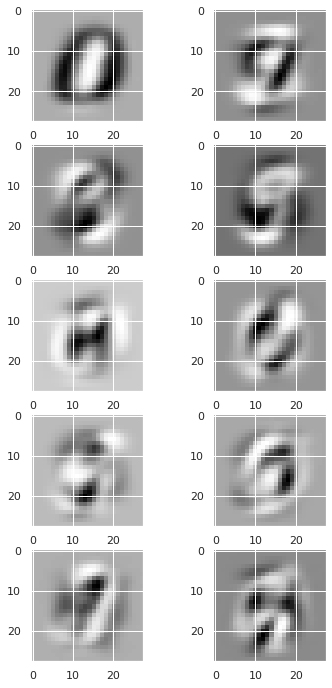

In [40]:
# Visualizing the 'eigendigits'

pca_orig = PCA(n_components=50).fit(features_train_orig)

pca_orig.components_

fig, axes = plt.subplots(5, 2, figsize=(6,12))

for i in range(10):
    axes[i//2][i%2].imshow(np.reshape(pca_orig.components_[i,:], (28,28)), cmap="Greys")
    plt.subplots_adjust(wspace=None, hspace=None)

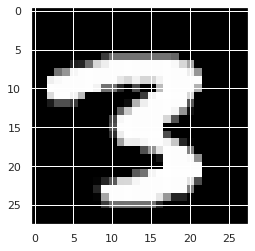

In [33]:
# Let's just take one random digit...

plt.imshow(features_train_orig.iloc[0:1,:].values.reshape((28,28)), cmap="Greys_r")

In [ ]:
# How would our PCA 'encode' this digit in 50 components?

examplePCA = pca_orig.transform(features_train_orig.iloc[0:1,:])

fig, axes = plt.subplots(25, 2, figsize=(10,85))

for i in range(50):
    ax = axes[i//2][i%2]
    ax.title.set_text(examplePCA[0][i])
    ax.set_xticks([])
    ax.set_yticks([])
    axes[i//2][i%2].imshow(np.reshape(pca_orig.components_[i,:], (28,28)), cmap="Greys")
    plt.subplots_adjust(wspace=None, hspace=None)

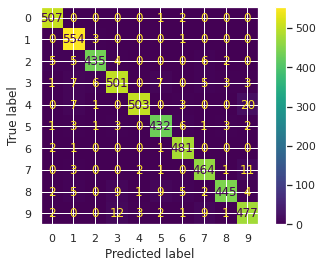

In [43]:
# let's zoom in on our model's misclassifications...

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target_pred = knn.predict(features_test_pca)
confusion = confusion_matrix(target_test, target_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[x for x in range(10)])

disp.plot()
plt.show()

In [ ]:
fours_as_nines = features_test_orig[(target_test==4) & (target_pred==9)].reset_index(drop=True)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,20))

for index, row in fours_as_nines.iterrows():
    axes[index//5][index%5].imshow(row.values.reshape((28,28)), cmap="Greys_r")
    
plt.show()